In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#training data gerneration
x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g = 0.8*x1 + x2 - 3
g1 = g - 1
g0 = g + 1

C1 = np.where(g1 >= 0)[0]
C0 = np.where(g0 < 0)[0]

In [2]:
C1

array([ 4,  6, 14, 17, 22, 32, 33, 34, 37, 38, 40, 45, 51, 53, 55, 56, 58,
       59, 60, 61, 64, 70, 71, 82, 86, 87, 92, 94, 96, 98])

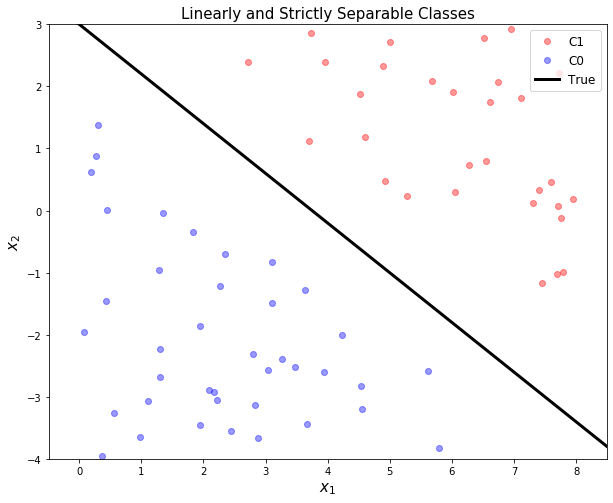

In [3]:
xp = np.linspace(-1,9,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', linewidth = 3, label = 'True')
plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

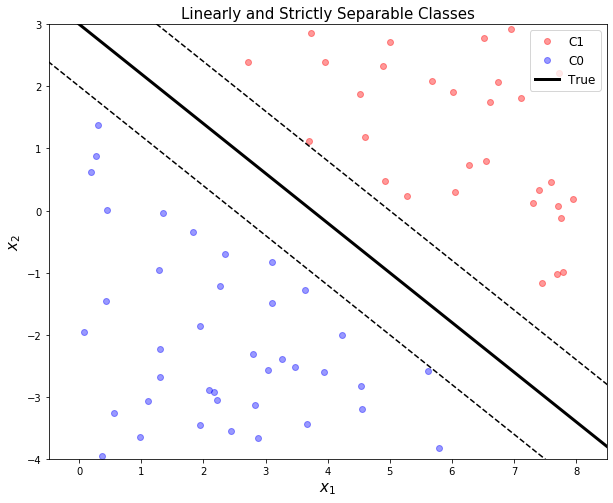

In [4]:
#  see how data are generated
xp = np.linspace(-1,9,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', linewidth = 3, label = 'True')
plt.plot(xp, ypt-1, '--k')
plt.plot(xp, ypt+1, '--k')
plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [5]:
# CVXPY using simple classification
import cvxpy as cvx

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

N = X1.shape[0]
M = X0.shape[0]

In [6]:
N, M

(30, 39)

In [7]:
w0 = cvx.Variable([1,1])
w = cvx.Variable([2,1])

obj = cvx.Minimize(1) # min something
const = [w0 + X1*w >= 1, w0 + X0*w <= -1] 
prob = cvx.Problem(obj, const).solve()
w0 = w0.value
w = w.value

In [8]:
w0, w

(array([[-2.97058138]]), array([[0.80901734],
        [1.0799219 ]]))

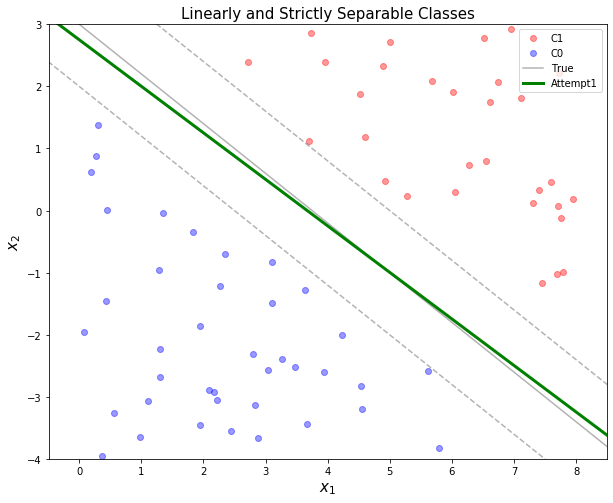

In [9]:
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[0,0]/w[1,0]*xp - w0/w[1,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')

plt.plot(xp, ypt, 'k', alpha = 0.3, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha = 0.3)
plt.plot(xp, ypt+1, '--k', alpha = 0.3)
plt.plot(xp, yp, 'g', linewidth=3, label = 'Attempt1')

plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [10]:
N = C1.shape[0]
M = C0.shape[0]

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

In [11]:
w = cvx.Variable([3,1])

obj = cvx.Minimize(1)
const = [X1*w >= 1, X0*w <= -1]
prob = cvx.Problem(obj, const).solve()
print(w)
w = w.value


var46


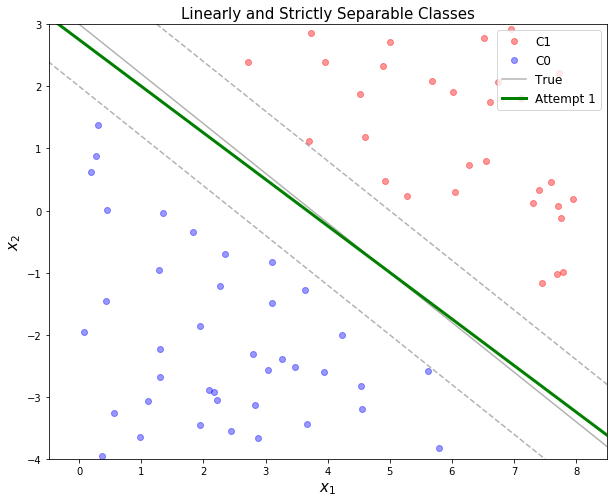

In [12]:
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', alpha = 0.3, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha = 0.3)
plt.plot(xp, ypt+1, '--k', alpha = 0.3)
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Attempt 1')
plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

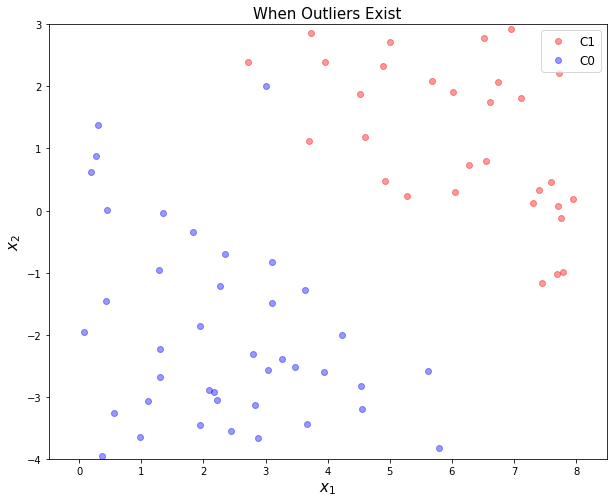

In [13]:
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

outlier = np.array([1, 3, 2]).reshape(1,-1)
X0 = np.vstack([X0, outlier])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10,8))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.4, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.4, label = 'C0')
plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [14]:
w = cvx.Variable([3,1])

obj = cvx.Minimize(1)
const = [X1*w >= 1, X0*w <= -1]
prob = cvx.Problem(obj, const).solve()

print(w.value)
# 구분할 수 있는 선을 그릴 수 없다 : outlier가 존재

[[-4586202.16894444]
 [ 1000117.72958775]
 [  789174.79498566]]


In [15]:
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

outlier = np.array([1, 2, 2]).reshape(1,-1)
X0 = np.vstack([X0, outlier])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

N = X1.shape[0]
M = X0.shape[0]

In [16]:
w = cvx.Variable([3,1])
u = cvx.Variable([N,1])
v = cvx.Variable([M,1])

obj = cvx.Minimize(np.ones(u.shape).T*u+np.ones(v.shape).T*v)
const = [X1*w >= 1-u, X0*w <= -(1-v), u>=0, v>=0]
prob = cvx.Problem(obj, const).solve()

w = w.value

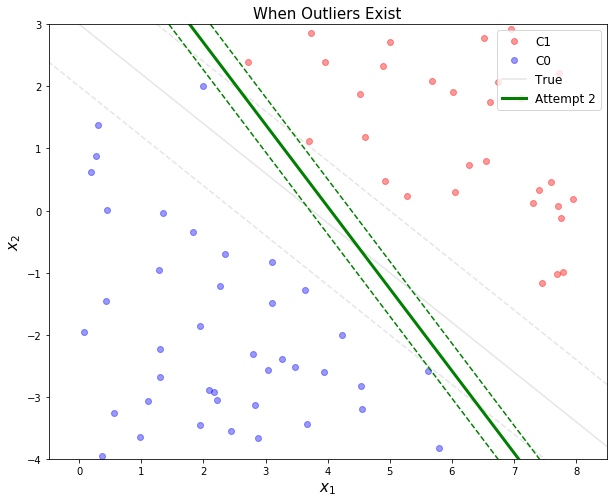

In [17]:
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.4, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', alpha = 0.1, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha = 0.1)
plt.plot(xp, ypt+1, '--k', alpha = 0.1)
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Attempt 2')
plt.plot(xp, yp-1/w[2,0], '--g')
plt.plot(xp, yp+1/w[2,0], '--g')
plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [19]:
#SVM
X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

m = N + M

g = 2

w = cvx.Variable([3,1])
d = cvx.Variable([m,1])

obj = cvx.Minimize(cvx.norm(w,2)+g*(np.ones([1,m])*d))
const = [cvx.multiply(y, X*w) >= 1-d, d>= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

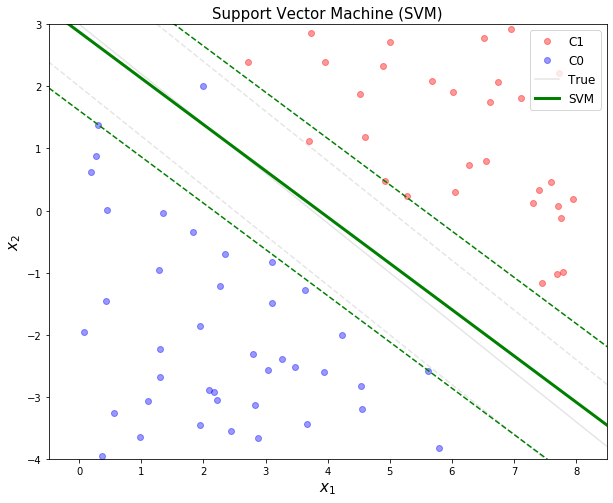

In [20]:
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.4, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.4, label = 'C0')

plt.plot(xp, ypt, 'k', alpha = 0.1, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha = 0.1)
plt.plot(xp, ypt+1, '--k', alpha = 0.1)
plt.plot(xp, yp, 'g', linewidth = 3, label = 'SVM')
plt.plot(xp, yp-1/w[2,0], '--g')
plt.plot(xp, yp+1/w[2,0], '--g')

plt.title('Support Vector Machine (SVM)', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

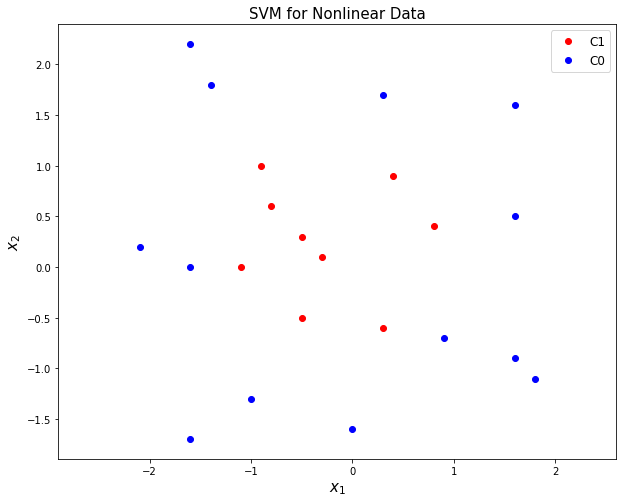

In [21]:
# Nonlinear SVM (Kernel)
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('SVM for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

In [22]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M
Z = np.hstack([np.ones([m,1]), np.square(X[:,0]), np.sqrt(2)*np.multiply(X[:,0],X[:,1]), np.square(X[:,1])])

In [23]:
g = 10

w = cvx.Variable([4, 1])
d = cvx.Variable([m, 1])

obj = cvx.Minimize(cvx.norm(w, 2) + g*np.ones([1,m])*d)
const = [cvx.multiply(y, Z*w) >= 1-d, d>=0]
prob = cvx.Problem(obj, const).solve()

w = w.value
print(w)

[[ 2.79259259]
 [-1.48148148]
 [-0.58925565]
 [-1.48148148]]


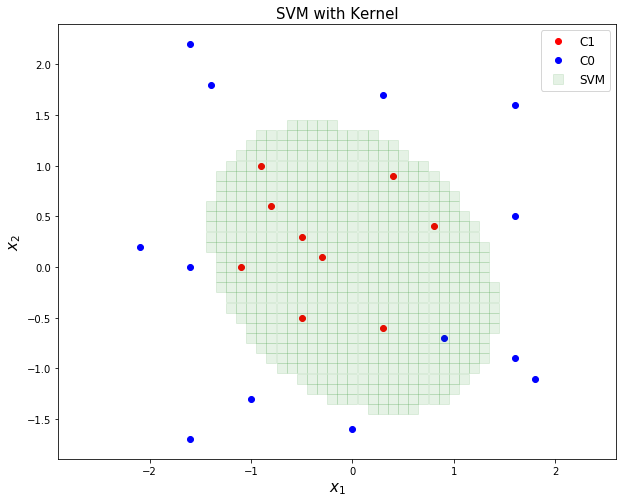

In [24]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.square(Xp[:,0]), np.sqrt(2)*np.multiply(Xp[:,0],Xp[:,1]), np.square(Xp[:,1])])
q = Zp*w

B = []
for i in range(m):
    if q[i,0] > 0:
        B.append(Xp[i,:])       

B = np.vstack(B)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.plot(B[:,0], B[:,1], 'gs', markersize = 10, alpha = 0.1, label = 'SVM')
plt.title('SVM with Kernel', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()